In [ ]:
import tensorflow as tf
import numpy as np
import keras
from keras import Model, Sequential
from keras.layers import Input, Convolution2D, ZeroPadding2D, MaxPooling2D, Flatten, Dense, Dropout, Activation

In [97]:
#initial VGG-Face model
model = Sequential()
model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(Convolution2D(4096, (7, 7), activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(4096, (1, 1), activation='relu'))
model.add(Dropout(0.5))

#age tracking layers
model.add(Convolution2D(100, (1, 1), name='predictions')) # change to 101 for pretrained weights, 117 for utkface
model.add(Flatten())
model.add(Activation('softmax'))

In [98]:
#model.load_weights('./weights/age_model_weights.h5')

In [99]:
import os
import cv2
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img, save_img, img_to_array
from keras.applications.imagenet_utils import preprocess_input
from keras.preprocessing import image
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [100]:
face_cascade = cv2.CascadeClassifier('../opencv4/haarcascades/haarcascade_frontalface_default.xml')
output_indexes = np.array([i for i in range(0, 117)])

In [101]:
#get filenames for training set
filenames = os.listdir('./UTKFace')

In [102]:
img_list = []
for i in range(0, 500):#len(filenames)):
    rawimg = cv2.resize(cv2.imread('./UTKFace/' + filenames[i]), (224, 224))
    img = cv2.cvtColor(rawimg, cv2.COLOR_BGR2RGB) / 255
    img_list.append(img)
    if i % 5000 == 0:
        print(str(i) + " of " + str(len(filenames)) + " images loaded")

0 of 23708 images loaded


In [103]:
age_list = []
for i in range(0, 500):#len(filenames)):
    age_list.append(int(filenames[i].split('_')[0]))
    if i % 5000 == 0:
        print(str(i) + " of " + str(len(filenames)) + " ages loaded")

0 of 23708 ages loaded


In [104]:
img_train, img_test, age_train, age_test = train_test_split(img_list, age_list, test_size=0.3)

In [105]:
print("starting")
img_train = np.array(img_train)
print("img_train done")
img_test = np.array(img_test)
print("img_test done")
age_train = keras.utils.to_categorical(np.array(age_train))
print("age_train done")
age_test = keras.utils.to_categorical(np.array(age_test))
print("age_test done")

starting
img_train done
img_test done
age_train done
age_test done


In [106]:
model.compile(optimizer='adam', loss='categorical_crossentropy')

In [ ]:
model.fit(img_train, age_train, batch_size=256, validation_split=0.2, epochs=1, verbose=1)

Train on 244 samples, validate on 106 samples
Epoch 1/1


In [95]:
model.evaluate(img_test, age_test)

ValueError: Error when checking target: expected activation_6 to have shape (100,) but got array with shape (91,)

In [27]:
img_path = './database/aditya_small.jpg'

In [28]:
rawimgbgr = cv2.imread(img_path)
rawimg = cv2.cvtColor(rawimgbgr, cv2.COLOR_BGR2RGB)

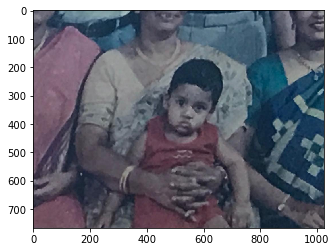

In [29]:
plt.imshow(rawimg)

In [30]:
faces = face_cascade.detectMultiScale(rawimg, 1.3, 5)

In [31]:
face = faces[0]
print(face)

[452 257 188 188]


In [32]:
x = face[0]
y = face[1]
w = face[2]
h = face[3]

In [33]:
#imgwface = cv2.rectangle(rawimg,(x,y),(x+w,y+h),(128,128,128),10)
#plt.imshow(imgwface)

In [34]:
cropped_face = rawimg[y:y+h, x:x+w]

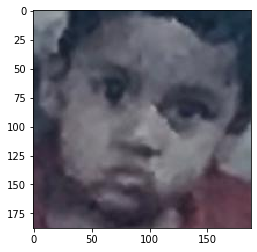

In [35]:
plt.imshow(cropped_face)

In [36]:
#try:
#	#age gender data set has 40% margin around the face. expand detected face.
#	margin = 30
#	margin_x = int((w * margin)/100); margin_y = int((h * margin)/100)
#	cropped_face = rawimg[y-margin_y:y+h+margin_y, x-margin_x:x+w+margin_x]
#	print("success!")
#except:
#	print("detected face has no margin")

In [37]:
#plt.imshow(cropped_face)

In [38]:
cropped_face = cv2.resize(cropped_face, (224, 224))

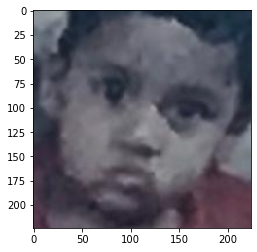

In [39]:
plt.imshow(cropped_face)

In [40]:
img_pixels = image.img_to_array(cropped_face)
img_pixels = np.expand_dims(img_pixels, axis = 0)
img_pixels /= 255

In [41]:
raw_age_dist = model.predict(img_pixels)
print(raw_age_dist)

In [44]:
mean_age = int(np.floor(np.sum(raw_age_dist * output_indexes, axis = 1)))
mode_age = np.argmax(raw_age_dist)
print(mean_age)
print(mode_age)

35
28


In [ ]:
target_probability = 0.90

age_distributions = raw_age_dist[0]
#print(age_distributions)
epsilon = 0
while sum(age_distributions[mean_age - epsilon : mean_age + epsilon + 1]) < target_probability:
    epsilon += 1
print(str(target_probability * 100) + "% confidence interval: (" + str(mean_age - epsilon) + ", " + str(mean_age + epsilon + 1) + ")")